# 고급통계학세미나HW2

###  2018220083 김은빈

#### (1) R for Data Science 의 flight 데이터를 dplyr 과 ggplot 을 활용하여 시각화 시키고, 해당 그래프를 요약하는 한 문장의 설명을 달 것.
- 목표: 그림은 이쁘게, 설명은 그림을 명확하게 설명할 수 있도록

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



dest,n
ATL,17215
BOS,15508
CLT,14064
FLL,12055
LAX,16174
MCO,14082
MIA,11728
ORD,17283
SFO,13331


carrier
UA
UA
AA
B6
DL
UA
B6
EV
B6
AA


carrier,n
9E,18460
AA,32729
AS,714
B6,54635
DL,48110
EV,54173
F9,685
FL,3260
HA,342
MQ,26397


carrier,n,prop
9E,18460,6
AA,32729,10
B6,54635,17
DL,48110,15
EV,54173,17
MQ,26397,8
UA,58665,19
US,20536,7



Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: 'plyr'

The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize



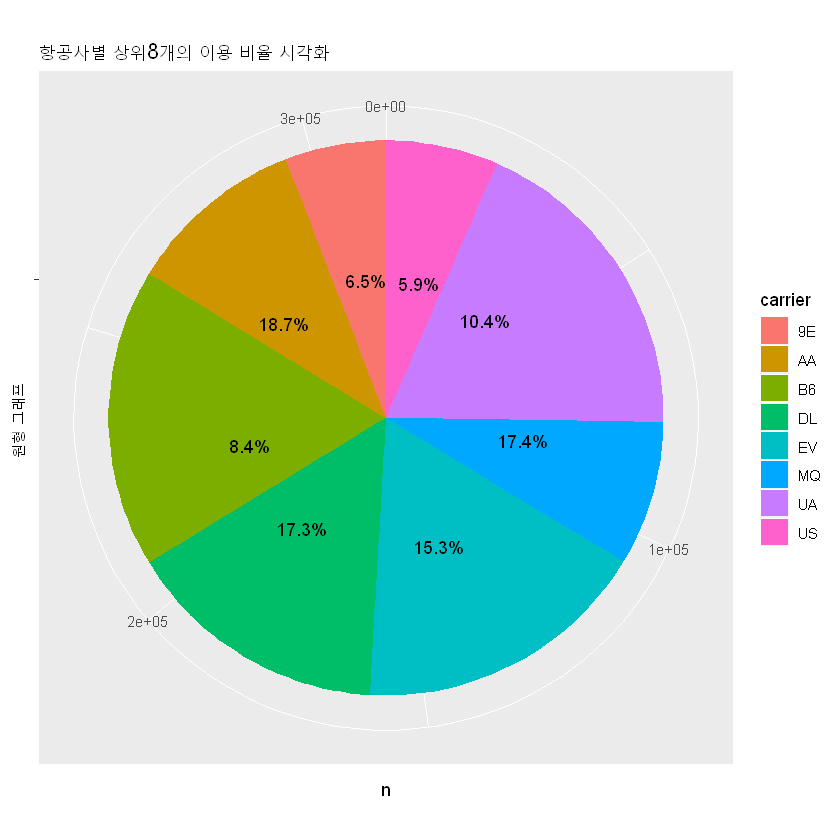

In [1]:

library(ggplot2)
library(dplyr)

library(nycflights13)


flights_df <- tbl_df(flights)

a=flights %>% group_by(dest) %>% summarise(n = n())
a4 <- filter(a, n > 10000)
# a4
flights %>% select(carrier)

ac = flights %>% group_by(carrier) %>% dplyr::summarise(n = n())

# ac
ac2<-ac %>% select(carrier,n)%>%filter(n>15000) %>%
  mutate(prop=round(n/sum(n),2)*100)%>%data.frame()
# ac2


ac2$pos <- with(ac2, ave(n, carrier, FUN = function(x) cumsum(x) - 0.35*x))

# with the data.table package
library(data.table)
setDT(ac2)
ac2 <- ac2[, pos:=cumsum(n)-0.35*n, by="carrier"]

# with the plyr package
library(plyr)
ac2 <- ddply(ac2, .(carrier), transform, pos=cumsum(n)-0.35*n)

# with the dplyr package
library(dplyr)
ac2 <- ac2 %>% group_by(carrier) %>% mutate(pos=cumsum(n)-0.35*n)

 

ggplot(ac2,aes(x="",y=n,fill=carrier))+
  ggtitle("항공사별 상위8개의 이용 비율 시각화  ") + 
  xlab("원형 그래프 ") + 
  geom_bar(stat="identity",width=2)+
  coord_polar(theta = "y")+
  geom_text(aes(x="", y=pos,
                label = paste0(round(n / sum(n) * 100, 1), "%")))


#### (2) list compression을 사용하여 1~100 사이의 수중 3의 배수를 나열하라

In [2]:
# 방법 1 
import numpy as np

Eun= np.array([x * 3 for x in range(1,34)])

print(" 방법 1 ","\n","1~100 사이의 수중 3의 배수는 : ",Eun)


ERROR: Error in parse(text = x, srcfile = src): <text>:2:8: 예상하지 못한 기호(symbol)입니다.
1: # 방법 1 
2: import numpy
          ^


In [9]:
# 방법 2
from math import sqrt
Been =np.array( [x for x in range(1,101) if x%3 == 0] ) 

print(" 방법 2 ","\n","1~100 사이의 수중 3의 배수는 : ",Been)


 방법 2  
 1~100 사이의 수중 3의 배수는 :  [ 3  6  9 12 15 18 21 24 27 30 33 36 39 42 45 48 51 54 57 60 63 66 69 72 75
 78 81 84 87 90 93 96 99]


#### (3) ids.txt 에 있는 사람들의 데이터만 new_data.txt에 저장하라

In [11]:
ids = []
with open('data/ids.txt', 'r') as f :
    for line in f :
        ids.append(line.strip())

In [51]:
with open('data/new_data.txt', "w") as f:
    
    f.write("data1 : \n\n")
    with open('data/data1.txt', "r") as data1:
        
        for item in data1: 
            ID=item.strip().split()[0]
            if ID in ids:
                f.write(item)
    f.write("\n\n")            
    
    with open('data/data2.txt', "r") as data2:
        f.write("data2 : \n\n")
        
        for item in data2:
            ID=item.strip().split()[0]
            if ID in ids:
                f.write(item)
    f.write("\n\n")
    f.write("i.e. \n")
    f.write("total : \n")
    with open('data/data1.txt', "r") as data1:
        
        for item in data1: 
            ID=item.strip().split()[0]
            if ID in ids:
                f.write(item)          
    with open('data/data2.txt', "r") as data2:
        f.write("\n")
        for item in data2:
            ID=item.strip().split()[0]
            if ID in ids:
                f.write(item)            

#### (4) yield 를 사용한 Generator 를 만드는 연습을 해보기

In [23]:
import sys

In [14]:
try : 
    os.mkdir(data)
except :
    pass

In [15]:
with open('data/Eun.txt', 'w') as f :
    f.write('ID\nEun\nBeen\nEunBeen\nKimEunBeen\n')

In [16]:
with open('data/Been.txt', 'w') as f :
    f.write('ID\tscore1\tscore2\tscore3\nEun\t1\t3\t1\nBeen\t1\t3\t3\nEunBeen\t1\t1\t1\nEunBeen\t1\t1\t2\nKimEunBeen\t1\t3\t2\nEun\t2\t2\t2\nKimEunBeen\t1\t2\t3\nKimEunBeen\t2\t1\t3\nEunBeen\t3\t2\t1\nEun\t3\t1\t2')

In [17]:
with open('data/EunBeen.txt', 'w') as f :
    f.write('ID\tscore1\tscore2\tscore3\nEunBeen\t2\t2\t2\nBeen\t2\t1\t3\nEunBeen\t1\t1\t1\nKimEunBeen\t1\t3\t2\nKimEunBeen\t1\t3\t3\nEun\t1\t2\t3\nEun\t3\t3\t3\nKimEunBeen\t3\t2\t1\nEunBeen\t1\t3\t2\nEun\t1\t2\t3')

In [18]:
EunBeen = 'data/EunBeen.txt'

In [19]:
def fgenerator(EunBeen, iter_option = 0) :
    with open(EunBeen, 'r', encoding='utf-8') as f :
        for idx, item in enumerate(f) :
            ID, V1, V2, V3 = item.strip().split()
            if iter_option == 0 :
                yield ID
            elif iter_option == 1 :
                yield V1
            elif iter_option == 2 :
                yield V2
            else :
                yield V3


In [20]:
%%time
gen_from_EunBeen = fgenerator(EunBeen)

Wall time: 0 ns


In [21]:
next(gen_from_EunBeen)

'ID'

In [24]:
sys.getsizeof(gen_from_EunBeen)

88

In [27]:
def freader(EunBeen, iter_option = 0) :
    IDs = []
    with open(EunBeen, 'r', encoding='utf-8') as f :
        for idx, item in enumerate(f) :
            ID, V1, V2, V3 = item.strip().split()
            if iter_option == 0 :
                IDs.append(ID)
            elif iter_option == 1 :
                IDs.append(V1)
            elif iter_option == 2 :
                IDs.append(V2)
            else :
                IDs.append(V3)
    return IDs

In [28]:
%%time
res_EunBeen = freader(EunBeen)

Wall time: 998 µs


In [29]:
sys.getsizeof(res_EunBeen)

192

generator with class

In [30]:
class DataGenerator() : 
    def __init__(self, EunBeen, iter_option=0) :
        self.EunBeen = EunBeen
        self.iter_option = iter_option
    
    def __iter__(self) :
        with open(EunBeen, 'r', encoding='utf-8') as f :
            for idx, item in enumerate(f) :
                ID, V1, V2, V3 = item.strip().split()
                if self.iter_option == 0 :
                    yield ID
                elif self.iter_option == 1 :
                    yield V1
                elif self.iter_option == 2 :
                    yield V2
                else :
                    yield V3
    
    def __len__(self) :
        with open(EunBeen, 'r', encoding='utf-8') as f :
            for idx, item in enumerate(f) :
                pass
            
            return idx
        

In [31]:
fnm = 'data/EunBeen.txt'

In [32]:
gen1_EunBeen = DataGenerator(EunBeen)

In [33]:
len(gen1_EunBeen)

10

In [35]:
for idx, item in enumerate(gen1_EunBeen) :
    print(item)

ID
EunBeen
Been
EunBeen
KimEunBeen
KimEunBeen
Eun
Eun
KimEunBeen
EunBeen
Eun
